# Ejercicio: Análisis y Modelado de la Calidad de Bananas

En este ejercicio se utilizará el dataset `banana_quality.csv` para realizar un análisis completo y desarrollar un modelo de clasificación (Regresión Logística) que permita predecir la calidad de las bananas (Good vs Bad). El ejercicio se divide en los siguientes pasos:

## Paso 1: Descargar el Dataset

Utiliza el siguiente enlace para descargar el dataset:

https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

In [1]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

--2025-03-20 04:20:20--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 630007 (615K) [text/plain]
Saving to: ‘banana_quality.csv’

banana_quality.csv  100%[===================>] 615.24K  --.-KB/s    in 0.04s   

2025-03-20 04:20:20 (16.4 MB/s) - ‘banana_quality.csv’ saved [630007/630007]



## Paso 2: Cargar el Dataset

Importa las librerías necesarias y carga el dataset en un DataFrame de Pandas.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
# Cargar el dataset
df = pd.read_csv('banana_quality.csv')

# Visualizar las primeras filas
print('Primeras filas del dataset:')
display(df.head())

Primeras filas del dataset:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


## Paso 3: Exploración Inicial

Revisa la información general del DataFrame y genera un resumen estadístico. Identifica la estructura y si existen valores nulos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [5]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [6]:
# Conteo absoluto de nulos por columna
nulos_absolutos = df.isnull().sum()
print('Nulos absolutos por columna:')
display(nulos_absolutos)

# Porcentaje de nulos por columna
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
print('Porcentaje de nulos por columna (%):')
display(porcentaje_nulos)

Nulos absolutos por columna:


,0
Size,0
Weight,0
Sweetness,0
Softness,0
HarvestTime,0
Ripeness,0
Acidity,0
Quality,0


Porcentaje de nulos por columna (%):


,0
Size,0.0
Weight,0.0
Sweetness,0.0
Softness,0.0
HarvestTime,0.0
Ripeness,0.0
Acidity,0.0
Quality,0.0


## Paso 4: Análisis de la Variable Objetivo

Cuenta cuántas instancias hay de cada categoría en la variable **Quality**. Esto permitirá identificar si existen desbalances en la clase.

In [7]:
df['Quality'].value_counts()

,count
Quality,
Good,4006
Bad,3994


## Paso 5: Preprocesamiento de la Variable Objetivo

Convierte la variable **Quality** a formato numérico (por ejemplo, Good -> 1 y Bad -> 0) para poder utilizarla en el modelo.

In [8]:
df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})

In [11]:
df['Quality'].value_counts()

,count
Quality,
1,4006
0,3994


## Paso 6: Selección de Variables (Features)

Define las variables independientes (X) y la variable dependiente (y). Usa todas las columnas numéricas o selecciona aquellas que consideres relevantes para predecir la calidad.

In [12]:
x = df[['Weight', 'Size', 'HarvestTime', 'Sweetness']]
y = df['Quality']

## Paso 7: División en Conjuntos de Entrenamiento y Prueba

Separa el dataset en un conjunto de entrenamiento (70%) y otro de evaluación/prueba (30%). Asegúrate de estratificar para mantener el balance de clases.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

Entrenamiento: 5600 muestras
Prueba: 2400 muestras


## Paso 8: Validación del Balanceo de Clases

Verifica que las clases estén balanceadas en los conjuntos de entrenamiento y prueba. Usa conteos y visualizaciones para comprobarlo.

Balance de clases en el conjunto de entrenamiento:


,count
Quality,
1,2804
0,2796


Balance de clases en el conjunto de prueba:


,count
Quality,
1,1202
0,1198


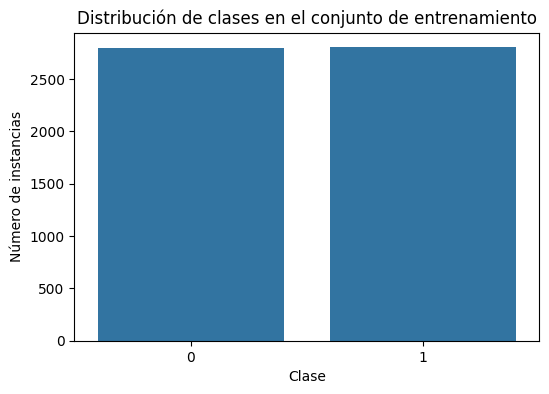

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Conteo de instancias por clase en el conjunto de entrenamiento
print('Balance de clases en el conjunto de entrenamiento:')
display(y_train.value_counts())

# Conteo de instancias por clase en el conjunto de prueba
print('Balance de clases en el conjunto de prueba:')
display(y_test.value_counts())

# Visualización con un countplot
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Distribución de clases en el conjunto de entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Número de instancias')
plt.show()

## Paso 9: Entrenamiento del Modelo de Regresión Logística

Importa el módulo de Regresión Logística de Scikit-Learn y entrena el modelo utilizando el conjunto de entrenamiento.

In [18]:
from sklearn.linear_model import LogisticRegression
# Crear el modelo de Regresión Logística
modelo = LogisticRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

print('Modelo entrenado.')

Modelo entrenado.


## Paso 10: Predicción en el Conjunto de Prueba

Utiliza el modelo entrenado para realizar predicciones en el conjunto de prueba.

In [20]:
# Realizar predicciones sobre el conjunto de prueba
y_pred_train = modelo.predict(X_test)
y_pred_train = modelo.predict(X_test)

## Paso 11: Evaluación del Modelo

Calcula las principales métricas de evaluación: accuracy, matriz de confusión, precisión, recall y f1-score. Además, genera un reporte de clasificación.

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  precision_score, recall_score, f1_score

# Calcular la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy:.2f}')

# Generar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
display(matriz_confusion)

# Mostrar el reporte de clasificación
reporte = classification_report(y_test, y_pred)
print('Reporte de Clasificación:')
print(reporte)

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print(f"Precisión: {precision:.2f}")

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.2f}")




Accuracy del modelo: 0.84
Matriz de Confusión:


array([[ 998,  200],
       [ 184, 1018]])

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1198
           1       0.84      0.85      0.84      1202

    accuracy                           0.84      2400
   macro avg       0.84      0.84      0.84      2400
weighted avg       0.84      0.84      0.84      2400

Precisión: 0.84
Recall: 0.85
F1-score: 0.84


## Paso 12: Visualización de la Matriz de Confusión y Curva ROC AUC

Visualiza la matriz de confusión mediante un heatmap. Luego, calcula y visualiza la curva ROC y el área bajo la curva (AUC) para evaluar la capacidad del modelo de distinguir entre las clases.

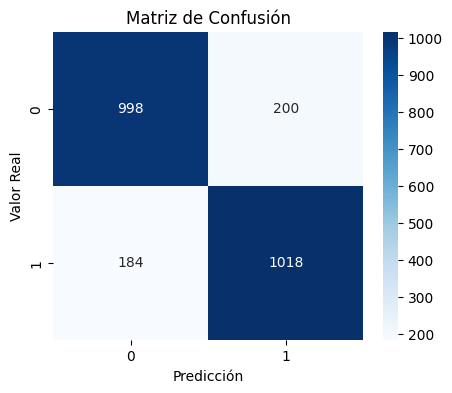

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [24]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades para la clase positiva
y_proba = modelo.predict_proba(X_test)[:, 1]

# Calcular las tasas de verdaderos positivos y falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f'Área bajo la curva ROC: {roc_auc:.2f}')

Área bajo la curva ROC: 0.92


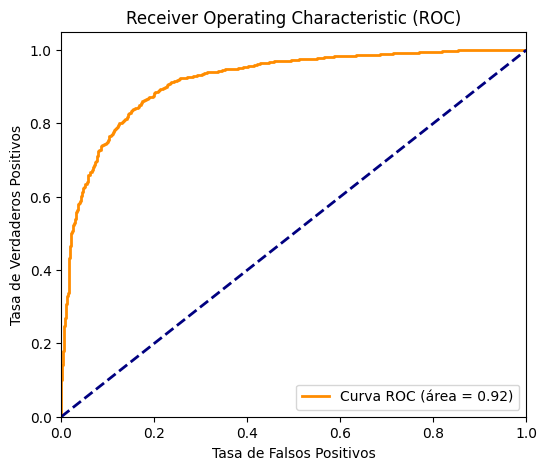

In [25]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Paso 13 (Opcional): Envío de Métricas por Correo

Como actividad adicional, prepara un código que genere un resumen con las 5 métricas principales (Accuracy, Precisión, Recall, F1-Score y AUC) y simula el envío de estas métricas por correo (puedes usar print o exportar a un archivo de texto como actividad de integración).

In [27]:
# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)  # Changed y_pred_test to y_pred
precision = precision_score(y_test, y_pred)  # Changed y_pred_test to y_pred
recall = recall_score(y_test, y_pred)      # Changed y_pred_test to y_pred
f1 = f1_score(y_test, y_pred)            # Changed y_pred_test to y_pred

y_proba = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Crear el resumen de las métricas
resumen_metricas = f"""
Resumen de Métricas del Modelo:

Accuracy: {accuracy:.2f}
Precisión: {precision:.2f}
Recall: {recall:.2f}
F1-Score: {f1:.2f}
AUC: {roc_auc:.2f}
"""

# Simular el envío por correo (usando print en este caso)
print("Simulando envío de correo electrónico...")
print("Asunto: Resumen de Métricas del Modelo")
print(resumen_metricas)

Simulando envío de correo electrónico...
Asunto: Resumen de Métricas del Modelo

Resumen de Métricas del Modelo:

Accuracy: 0.84
Precisión: 0.84
Recall: 0.85
F1-Score: 0.84
AUC: 0.92



## Conclusiones

En este ejercicio se ha llevado a cabo un análisis completo sobre la calidad de las bananas. A partir de los distintos pasos realizados, se espera que los estudiantes sean capaces de:

- Explorar y entender la estructura del dataset.
- Preprocesar los datos, incluyendo la conversión de variables categóricas a numéricas.
- Validar el balance de clases en los conjuntos de entrenamiento y prueba.
- Entrenar un modelo de Regresión Logística.
- Evaluar el modelo usando diversas métricas (accuracy, matriz de confusión, reporte de clasificación y curva ROC AUC).

Finalmente, deben ser capaces de interpretar los resultados y extraer conclusiones sobre la capacidad del modelo para predecir la calidad de las bananas.